In [1]:
from os.path import join, abspath
from os import getcwd

import matplotlib.pyplot as plt
import numpy as np

from src.data.load_dataset import load_V1_whitenoise
from src.models.weights import V1_weights, V1_weights_for_plotting

In [2]:
data_dir = abspath(join(getcwd(), '../../'))

#### Plot V1 receptive field from white noise stimuli dataset

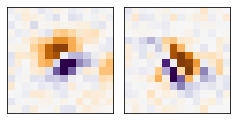

In [3]:
rf_data, snr, dim = load_V1_whitenoise(centered=True)
center = (int(dim[0] / 2), int(dim[1] / 2))
rf = rf_data[snr > 0.4]
num_cells = rf.shape[0]
rf_norm = (rf - np.mean(rf, axis=1).reshape(-1, 1)) / np.std(rf, axis=1).reshape(-1, 1)

# cells = [12, 210, 120, 27]
cells = [12, 24]
fig = plt.figure(figsize=(4, 2))
for i, cell in enumerate(cells[:2]):
    ax = fig.add_subplot(1, 2, i+1)
    plt.imshow(rf_norm[cell].reshape(dim)[:14, 11:25], cmap='PuOr')
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
    plt.clim(-6, 6)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/v1_rf.pdf',
#             dpi=300, transparent=True, pad_inches = 0)

#### Generate some receptive fields and plot

In [4]:
## generate V1 weights
s, f, c, scale = 1.87, 0.70, center, 1
W = V1_weights(num_cells, dim, s, f, c, scale, seed=20)
W = (W - np.mean(W, axis=1).reshape(-1, 1)) / np.std(W, axis=1).reshape(-1, 1)

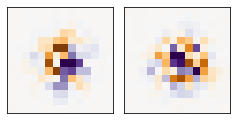

In [5]:
cells = [99, 17, 45, 14, 5, 45]
fig = plt.figure(figsize=(4, 2))
for i, cell in enumerate(cells[:2]):
    ax = fig.add_subplot(1, 2, i+1)
    plt.imshow(W[cell].reshape(dim)[:14, 11:25], cmap='PuOr')
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
    plt.clim(-6, 6)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/generated_rf.pdf',
#             dpi=300, transparent=False, pad_inches = 0)

#### Plot receptive fields of icreasing size

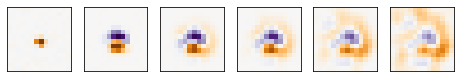

In [6]:
s_list = [0.5, 1.25, 2, 2.25, 3, 4.25]
f = 2

fig = plt.figure(figsize=(8, 6))
for i, s in enumerate(s_list):
    ax = fig.add_subplot(1, 6, i+1)
    W = V1_weights_for_plotting(20, dim, s, f, center, scale=1, random_state=20)
    plt.imshow(W[10].reshape(dim)[:14, 11:25], cmap='PuOr')
    plt.clim(-5, 5)
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/rf_increasing_size.pdf',
#             dpi=300, transparent=False, pad_inches = 0)

#### Plot receptive fields of increasing spatial frequency

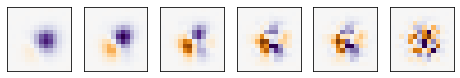

In [7]:
f_list = [0.1, 1.1, 1.25, 2, 3, 5.1]
s = 2

fig = plt.figure(figsize=(8, 6))
for i, f in enumerate(reversed(f_list)):
    ax = fig.add_subplot(1, 6, i+1)
    W = V1_weights_for_plotting(20, dim, s, f, center, scale=1, random_state=22)
    plt.imshow(W[2].reshape(dim)[:14, 11:25], cmap='PuOr')
    plt.clim(-5, 5)
    ax.tick_params(axis='both', which='both', left=False, bottom=False, 
               labelleft=False, labelbottom=False)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_4/rf_increasing_frequency.pdf',
#             dpi=300, transparent=False, pad_inches = 0)